# Data mining techniques: Assignment 2

This environment makes use of the R statistical analytics software tool

In [1]:
library("gbm")

Warning message:
“package ‘gbm’ was built under R version 3.4.4”Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


In [1]:
trainPath <- "Data Mining VU data/training_set_VU_DM_2014.csv"
testPath <- "Data Mining VU data/test_set_VU_DM_2014.csv"

trainNames <- colnames(read.csv(trainPath,nrows = 1))
testNames <- colnames(read.csv(testPath,nrows = 1))

#train <- read.csv(trainPath,header=F,skip=1,nrows = 100000)
#test <- read.csv(testPath,header=F,skip=1,nrows = 20)

train <- read.csv(trainPath)
#test <- read.csv(testPath)

colnames(train) <- trainNames
#colnames(test) <- testNames

In [2]:
colnames(train)

head(train)

[1] "srch_id"                     "date_time"                  
 [3] "site_id"                     "visitor_location_country_id"
 [5] "visitor_hist_starrating"     "visitor_hist_adr_usd"       
 [7] "prop_country_id"             "prop_id"                    
 [9] "prop_starrating"             "prop_review_score"          
[11] "prop_brand_bool"             "prop_location_score1"       
[13] "prop_location_score2"        "prop_log_historical_price"  
[15] "position"                    "price_usd"                  
[17] "promotion_flag"              "srch_destination_id"        
[19] "srch_length_of_stay"         "srch_booking_window"        
[21] "srch_adults_count"           "srch_children_count"        
[23] "srch_room_count"             "srch_saturday_night_bool"   
[25] "srch_query_affinity_score"   "orig_destination_distance"  
[27] "random_bool"                 "comp1_rate"                 
[29] "comp1_inv"                   "comp1_rate_percent_diff"    
[31] "comp2_rate"                  "comp2_inv"                  
[33] "comp2_rate_percent_diff"     "comp3_rate"                 
[35] "comp3_inv"                   "comp3_rate_percent_diff"    
[37] "comp4_rate"                  "comp4_inv"                  
[39] "comp4_rate_percent_diff"     "comp5_rate"                 
[41] "comp5_inv"                   "comp5_rate_percent_diff"    
[43] "comp6_rate"                  "comp6_inv"                  
[45] "comp6_rate_percent_diff"     "comp7_rate"                 
[47] "comp7_inv"                   "comp7_rate_percent_diff"    
[49] "comp8_rate"                  "comp8_inv"                  
[51] "comp8_rate_percent_diff"     "click_bool"                 
[53] "gross_bookings_usd"          "booking_bool"

srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,⋯,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
1,2013-04-04 08:32:15,12,187,NULL,NULL,219,893,3,3.5,⋯,NULL,NULL,NULL,NULL,0,0,NULL,0,NULL,0
1,2013-04-04 08:32:15,12,187,NULL,NULL,219,10404,4,4.0,⋯,NULL,NULL,NULL,NULL,0,0,NULL,0,NULL,0
1,2013-04-04 08:32:15,12,187,NULL,NULL,219,21315,3,4.5,⋯,NULL,NULL,NULL,NULL,0,0,NULL,0,NULL,0
1,2013-04-04 08:32:15,12,187,NULL,NULL,219,27348,2,4.0,⋯,NULL,NULL,NULL,NULL,-1,0,5,0,NULL,0
1,2013-04-04 08:32:15,12,187,NULL,NULL,219,29604,4,3.5,⋯,NULL,NULL,NULL,NULL,0,0,NULL,0,NULL,0
1,2013-04-04 08:32:15,12,187,NULL,NULL,219,30184,4,4.5,⋯,NULL,NULL,NULL,NULL,0,0,7,0,NULL,0


In [3]:
summary(train)

    srch_id                     date_time          site_id      
 Min.   :     1   2012-11-02 14:04:51:     95   Min.   : 1.000  
 1st Qu.: 82936   2012-12-26 10:59:30:     87   1st Qu.: 5.000  
 Median :166507   2013-05-15 18:39:51:     70   Median : 5.000  
 Mean   :166367   2012-11-23 07:28:55:     69   Mean   : 9.953  
 3rd Qu.:249724   2012-12-03 10:33:44:     68   3rd Qu.:14.000  
 Max.   :332785   2012-12-26 14:26:28:     68   Max.   :34.000  
                  (Other)            :4957890                   
 visitor_location_country_id visitor_hist_starrating visitor_hist_adr_usd
 Min.   :  1.0               NULL   :4706481         NULL   :4705359     
 1st Qu.:100.0               4.0    :  23416         128.34 :    609     
 Median :219.0               3.0    :  20879         117.68 :    579     
 Mean   :175.3               3.5    :  17088         270.36 :    514     
 3rd Qu.:219.0               2.5    :  10534         65.0   :    275     
 Max.   :231.0               2.0    

In [11]:
summary(test)

    srch_id                     date_time          site_id      
 Min.   :     1   2013-02-07 11:24:56:     92   Min.   : 1.000  
 1st Qu.: 83312   2012-11-28 13:44:30:     91   1st Qu.: 5.000  
 Median :167095   2012-12-10 21:20:09:     70   Median : 5.000  
 Mean   :166646   2013-05-15 10:01:46:     69   Mean   : 9.979  
 3rd Qu.:249966   2012-11-13 16:48:10:     68   3rd Qu.:14.000  
 Max.   :332787   2012-12-04 17:39:19:     68   Max.   :34.000  
                  (Other)            :4958725                   
 visitor_location_country_id visitor_hist_starrating visitor_hist_adr_usd
 Min.   :  1.0               NULL   :4705752         NULL   :4704559     
 1st Qu.:100.0               4.0    :  24340         128.34 :    860     
 Median :219.0               3.0    :  21437         117.68 :    799     
 Mean   :175.3               3.5    :  15268         270.36 :    494     
 3rd Qu.:219.0               2.5    :  10625         117.86 :    461     
 Max.   :231.0               2.0    

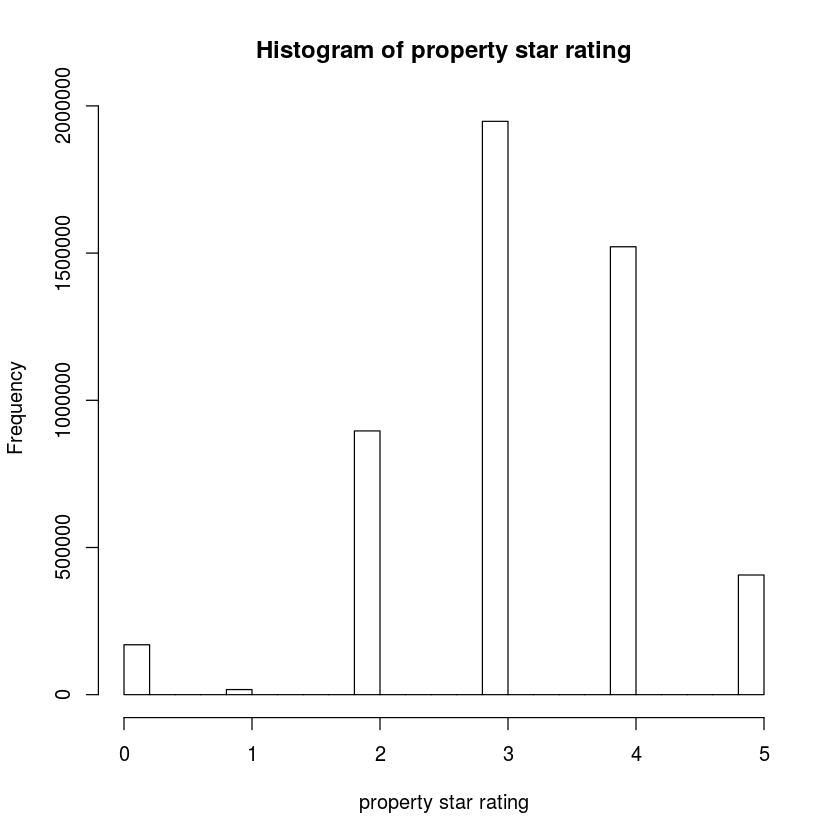

In [4]:
hist(train["prop_starrating"][,1],main="Histogram of property star rating",xlab="property star rating")

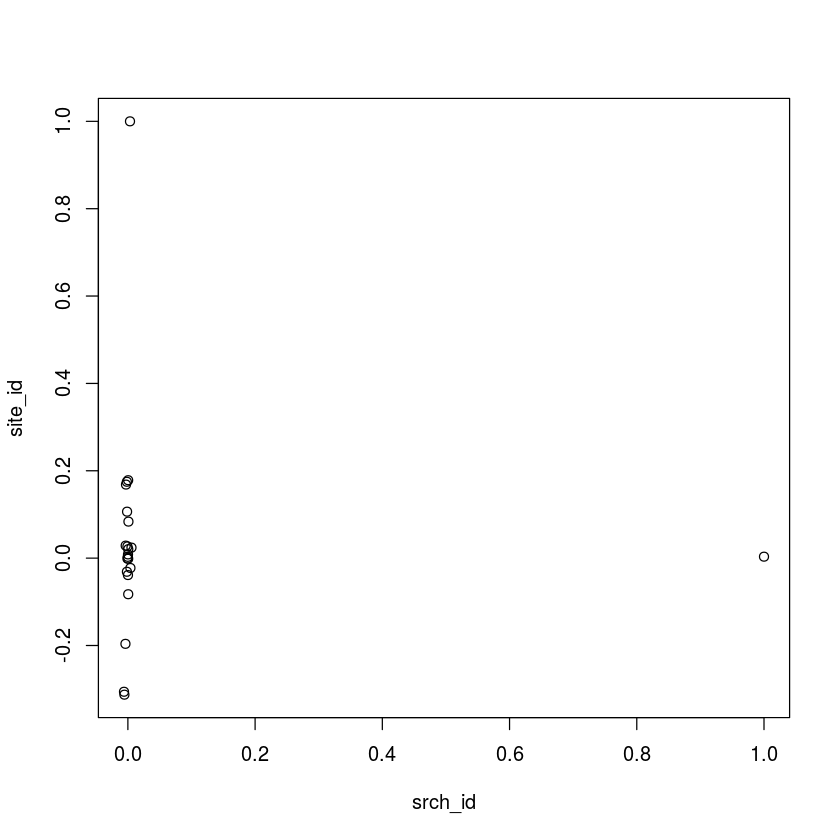

In [5]:
train.nums <- unlist(lapply(train, is.numeric))
#train.noNA <- unlist(lapply(train[,train.nums], is.na))

plot(cor(train[,train.nums]))